<a href="https://colab.research.google.com/github/rohang1411/Malaria-Parasite-Detection/blob/main/Malaria_Type_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Dataset

In [1]:
!wget https://github.com/saife245/MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis/archive/refs/heads/master.zip

--2021-04-15 20:10:06--  https://github.com/saife245/MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis/archive/refs/heads/master.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/saife245/MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis/zip/refs/heads/master [following]
--2021-04-15 20:10:06--  https://codeload.github.com/saife245/MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [              <=>   ]   2.17G  15.5MB/s    in 2m 7s 

### Extracting the Dataset

In [2]:
import os
import zipfile

os.listdir('/content')
local_zip = 'master.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
os.listdir('MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master')

['README.md',
 'Malariae',
 'DatasetDescription.pdf',
 'Vivax',
 'Region_wise_death_malaria.csv',
 'confirmed_cases_malaria.csv',
 'Falciparum',
 'Ovale']

### Deleting unecessary files from dataset

In [4]:
!rm -rf 'MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master/Falciparum/gt'
!rm -rf 'MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master/Vivax/gt'
!rm -rf 'MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master/Ovale/gt'
!rm -rf 'MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master/Malariae/gt'

In [5]:
train_Falci_dir = os.path.join('MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master/Falciparum/img')
train_Malariae_dir = os.path.join('MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master/Malariae/img')
train_Ovale_dir = os.path.join('MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master/Ovale/img')
train_Vivax_dir = os.path.join('MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master/Vivax/img')

In [6]:
train_Falci_names = os.listdir(train_Falci_dir)
print(train_Falci_names[:3])

train_Malariae_names = os.listdir(train_Malariae_dir)
print(train_Malariae_names[:3])

train_Ovale_names = os.listdir(train_Ovale_dir)
print(train_Ovale_names[:3])

train_Vivax_names = os.listdir(train_Vivax_dir)
print(train_Vivax_names[:3])

['1701151546-0015-R_T.tif', '1704282807-0020-R_T_S.tif', '1704282807-0004-R_T.tif']
['1401063467-0012-S.tif', '1401080976-0003-T.tif', '1401063467-0011-G.tif']
['1707180816-0018-G.tif', '1707180816-0006-T.tif', '1707180816-0008-G.tif']
['1703121298-0001-G_R.tif', '1709041080-0038-S.tif', '1709041080-0034-R.tif']


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

### Dataset Samples

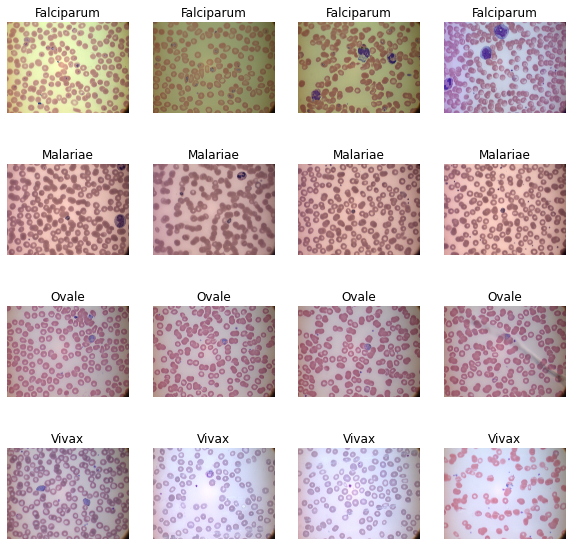

In [9]:
fig = plt.gcf()
fig.set_size_inches(10,10)
pic_index = 0
pic_index += 4
next_Falci_pix = [os.path.join(train_Falci_dir, fname) 
                for fname in train_Falci_names[pic_index-4:pic_index]]
next_Malariae_pix = [os.path.join(train_Malariae_dir, fname) 
                for fname in train_Malariae_names[pic_index-4:pic_index]]
next_Ovale_pix = [os.path.join(train_Ovale_dir, fname) 
                for fname in train_Ovale_names[pic_index-4:pic_index]]
next_Vivax_pix = [os.path.join(train_Vivax_dir, fname) 
                for fname in train_Vivax_names[pic_index-4:pic_index]]
          
count=0
# print(next_Falci_pix)
for i, img_path in enumerate(next_Falci_pix+next_Malariae_pix+next_Ovale_pix+next_Vivax_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  count=count+1
  if count<=4:
    sp.set_title('Falciparum')
  elif count>4 and count<=8:
    sp.set_title('Malariae')
  elif count>8 and count<=12:
    sp.set_title('Ovale')
  else:
    sp.set_title('Vivax')
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Using ImageDataGenerator

Here the ImageDataGenerator is used to split the dataset into training and validation data using a split size of 0.1. Since the dataset is very small I have used Image augmentation to mimic a larger dataset. THe images are also scaled down to 100px X 100px resolution. Images are also normalised to values between 0 and 1 using the rescale parameter. 

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.1,
                                   rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        'MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master',  
        target_size=(100,100),  
        # batch_size=12,
        class_mode='categorical',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
        'MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master', 
        target_size=(100,100),  
        # batch_size=12,
        class_mode='categorical',
        subset='validation')


Found 191 images belonging to 4 classes.
Found 19 images belonging to 4 classes.


In [11]:
import tensorflow as tf

# Model Architecture

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              17335296  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

In [14]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [15]:
history = model.fit(
      train_generator,
      epochs=10,
      verbose=2,
      validation_data = validation_generator
      )

Epoch 1/10
6/6 - 43s - loss: 2.5985 - accuracy: 0.2670 - val_loss: 1.2598 - val_accuracy: 0.5263
Epoch 2/10
6/6 - 12s - loss: 1.3843 - accuracy: 0.4136 - val_loss: 1.2153 - val_accuracy: 0.5263
Epoch 3/10
6/6 - 9s - loss: 1.2869 - accuracy: 0.4921 - val_loss: 1.1959 - val_accuracy: 0.5263
Epoch 4/10
6/6 - 10s - loss: 1.2489 - accuracy: 0.4869 - val_loss: 1.2127 - val_accuracy: 0.5263
Epoch 5/10
6/6 - 9s - loss: 1.2228 - accuracy: 0.4921 - val_loss: 1.2727 - val_accuracy: 0.5263
Epoch 6/10
6/6 - 9s - loss: 1.1314 - accuracy: 0.4921 - val_loss: 1.3219 - val_accuracy: 0.5263
Epoch 7/10
6/6 - 9s - loss: 1.0792 - accuracy: 0.4921 - val_loss: 1.3643 - val_accuracy: 0.5263
Epoch 8/10
6/6 - 9s - loss: 1.0604 - accuracy: 0.4921 - val_loss: 1.3462 - val_accuracy: 0.5263
Epoch 9/10
6/6 - 9s - loss: 0.9996 - accuracy: 0.4921 - val_loss: 1.3215 - val_accuracy: 0.5263
Epoch 10/10
6/6 - 9s - loss: 0.9882 - accuracy: 0.5340 - val_loss: 1.2884 - val_accuracy: 0.5263


Text(0, 0.5, 'Accuracy')

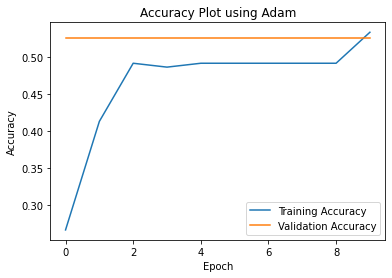

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label='Training Accuracy')
plt.plot(history.history["val_accuracy"],label='Validation Accuracy')
plt.title("Accuracy Plot using Adam")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")